In [1]:
%matplotlib notebook
import sys
sys.path.append(r"/home/jonathan/PycharmProjects/sigpy-rf")

# the fundamental sigpy imports: numpy, sigpy (here as submodules)
import numpy as np
import sigpy as sp
import sigpy.plot as pl
import sigpy.mri as mr
import sigpy.mri.rf as rf

# to assist with importing data, we will also import scipy
import scipy.io as sio
import scipy.ndimage.filters as filt
import matplotlib.pyplot as mplib

# for GPU comparison later
import timeit

import ipywidgets as widgets

<IPython.core.display.Javascript object>


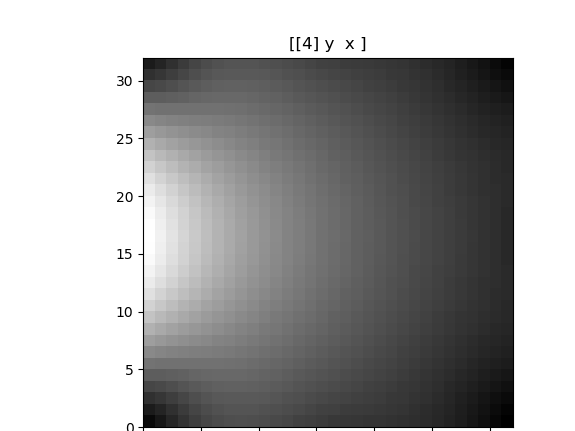

In [2]:
dim = 32
Nc = 8
img_shape = [dim, dim]
sens_shape = [Nc, dim, dim]
sens = mr.birdcage_maps(sens_shape)
pl.ImagePlot(sens)

In [3]:
fov = 0.55  # FOV in m
N = dim  # matrix size
gts = 6.4e-6  # hardware dwell time, s
gslew = 150  # gradient slew rate in mT/m/ms
gamp = 30 # maximum gradient amplitude in mT/m
densamp = 10000  # duration of full density sampling (in samples)
dentrans = 10000  # duration of transition from low-high density (in samples)
R = 1/2  # degree of undersampling of outer region of trajectory- let's oversample by a factor of 2
dx = 0.025 # in m
rewinder = False
# construct a trajectory
g, k, t, s = rf.spiral_arch(fov/R,dx,gts,gslew,gamp)

#Note that this trajectory is a spiral-out trajectory. 
#We will simply time-reverse it to create a spiral-in.
k = np.flipud(k)
g = np.flipud(g)


mplib.figure()
mplib.plot(k[:,0],k[:,1], color='orange')
mplib.title('Constant density spiral-in trajectory kx and ky')
mplib.figure()
mplib.plot(g)
mplib.title('Gradient waveforms')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Gradient waveforms')

<IPython.core.display.Javascript object>


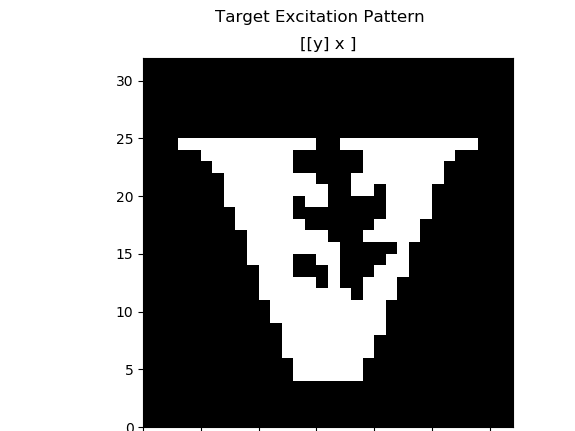

In [4]:
mat_struct = sio.loadmat('data/smallv.mat')
d = mat_struct['d'].astype(np.complex)
pl.ImagePlot(d, title='Target Excitation Pattern')

In [5]:
pulses = rf.wstspa(d, sens, k, alpha=0.01, max_iter=100, tol=1e-7, phase_update_interval=10)
pl.LinePlot(pulses, title = '8 Channel Pulses')

ValueError: Invalid shapes: [52, 52], (8, 32, 32).